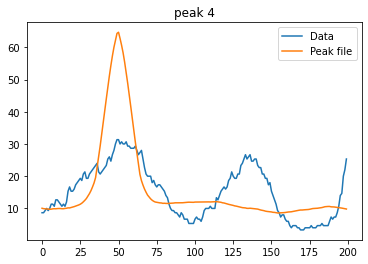

In [114]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
peak_num = "4"
peak_file = "/cs/labs/michall/roeizucker/HomeWork/comp_gen/peak" + peak_num +".wig"
lines = []
swapped = False
with open("/cs/labs/michall/roeizucker/HomeWork/comp_gen/plot_profile_nameData.tab") as name_data_file:
    for line in name_data_file:
        lines.append(line)
#         print(line)
data = np.array(lines[2].split("\t")[2:], dtype=float)
lines = []
with open(peak_file) as peak_file:
    peak_file.readline()
    for line in peak_file:
        lines.append(line.split("\t")[1][:-1])
peak = np.array(lines,dtype=float)
best_loc = 0

if len(peak) > len(data):
    swapped = True
    temp = data
    data = peak
    peak = temp


best_score = np.abs(np.sum(
        np.abs(peak - (data[0:len(peak) + 0 ]))
    ))

# best_score = np.abs(np.sum(peak - (data[0:len(peak) ])))

for i in range(len(data) - len(peak)):
    curr_score = np.abs(np.sum(
        np.abs(peak - (data[i:len(peak) + i ]))
    ))
    if curr_score < best_score:
        best_score = curr_score
        best_loc = i
slope, intercept, r_value, p_value, std_err = stats.linregress(data[best_loc:len(peak) + best_loc ],peak)

# print(slope)
# print(best_score)
# print((peak - (data[best_loc:len(peak) + best_loc ])))

# print(np.abs(np.sum(
#         np.abs(peak - (data[best_loc + 10:len(peak) + best_loc + 10 ]))
#     )))

if swapped:
    plt.plot((data[best_loc:len(peak) + best_loc])*slope)
    plt.plot(peak)
else:
    plt.plot(peak)
    plt.plot((data[best_loc:len(peak) + best_loc])*slope)

plt.title("peak " + peak_num)
plt.legend(["Data", "Peak file"])
plt.show()